In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

###Data 준비

In [3]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

###1개의 출력노드 
특정영역은 1, 이외의 영역은 0을 출력  
출력된 값이 0.5보다 크면 1로, 작으면 0으로 간주

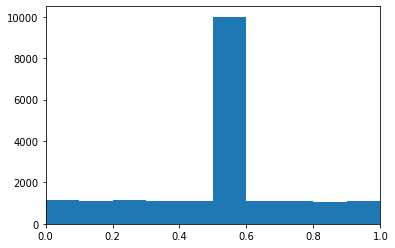

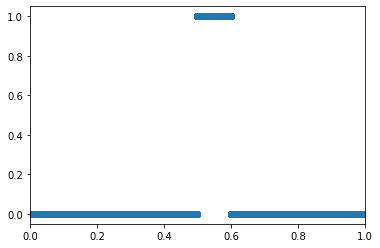

In [4]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 73us/sample - loss: 0.2488 - val_loss: 0.2470
Epoch 2/100
18000/18000 [==============================] - 1s 46us/sample - loss: 0.2450 - val_loss: 0.2436
Epoch 3/100
18000/18000 [==============================] - 1s 41us/sample - loss: 0.2422 - val_loss: 0.2406
Epoch 4/100
18000/18000 [==============================] - 1s 41us/sample - loss: 0.2387 - val_loss: 0.2366
Epoch 5/100
18000/18000 [==============================] - 1s 42us/sample - loss: 0.2340 - val_loss: 0.2309
Epoch 6/100
18000/18000 [==============================] - 1s 42us/sample - loss: 0.2268 - val_loss: 0.2224
Epoch 7/100
18000/18000 [==============================] - 1s 43us/sample - loss: 0.2165 - val_loss: 0.2103
Epoch 8/100
18000/18000 [==============================] - 1s 43us/sample - loss: 0.2015 - val_loss: 0.1927
Epoch 

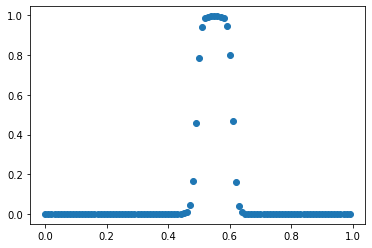

In [5]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

###2개의 클래스 분류
출력노드 2개

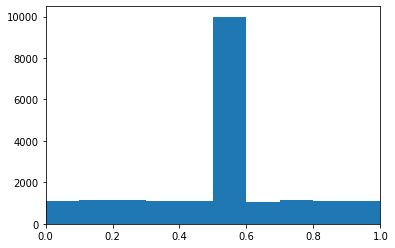

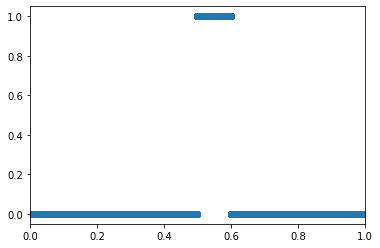

In [6]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

In [7]:
# ADD START
reshaped_y = train_y.reshape((train_y.shape[0],1))
train_y = np.append(reshaped_y, reshaped_y, axis=1)
train_y[:,1] = 1-train_y[:,0]
# ADD END

Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 47us/sample - loss: 0.2551 - val_loss: 0.2392
Epoch 2/100
18000/18000 [==============================] - 1s 41us/sample - loss: 0.2320 - val_loss: 0.2226
Epoch 3/100
18000/18000 [==============================] - 1s 39us/sample - loss: 0.2115 - val_loss: 0.1963
Epoch 4/100
18000/18000 [==============================] - 1s 39us/sample - loss: 0.1828 - val_loss: 0.1700
Epoch 5/100
18000/18000 [==============================] - 1s 39us/sample - loss: 0.1573 - val_loss: 0.1404
Epoch 6/100
18000/18000 [==============================] - 1s 39us/sample - loss: 0.1194 - val_loss: 0.0936
Epoch 7/100
18000/18000 [==============================] - 1s 39us/sample - loss: 0.0780 - val_loss: 0.0662
Epoch 8/100
18000/18000 [==============================] - 1s 42us/sample - loss: 0.0608 - val_loss: 0.0579
Epoch 9/100
18000/18000 [==============================] - 1s 41us/sample - loss: 0.055

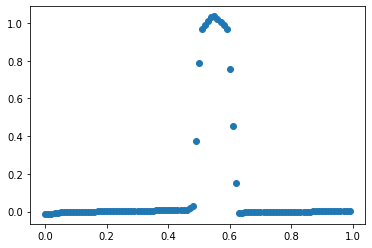

In [8]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_[:,0])

###4개의 클래스 분류

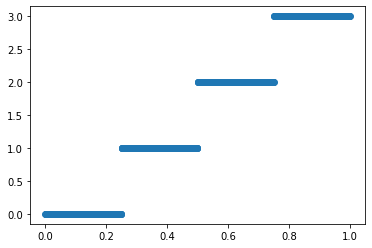

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [9]:
train_x = np.arange(0, 1, 0.001)

class_index = np.zeros_like(train_x, dtype=np.int)
class_index[:250] = 0
class_index[250:500] = 1
class_index[500:750] = 2
class_index[750:] = 3


plt.scatter(train_x, class_index)
plt.show()

train_y = np.zeros((1000, 4))
train_y[np.arange(1000), class_index] = 1 # one-hot 인코딩

print(train_y[245:255])

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1879 - val_loss: 0.2166
Epoch 2/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1585 - val_loss: 0.2136
Epoch 3/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1398 - val_loss: 0.2551
Epoch 4/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1311 - val_loss: 0.1994
Epoch 5/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1272 - val_loss: 0.1831
Epoch 6/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1245 - val_loss: 0.1755
Epoch 7/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1223 - val_loss: 0.1981
Epoch 8/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1191 - val_loss: 0.1988
Epoch 9/100
900/900 [==============================] - 1s 1ms/sample - loss: 0.1147 - val_loss: 0.1703
Epoch 10/100
900/900 [=====

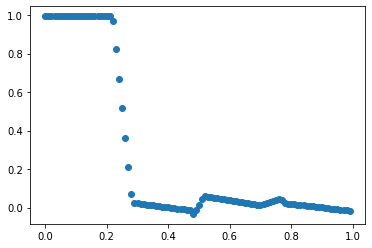

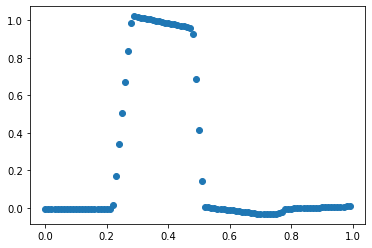

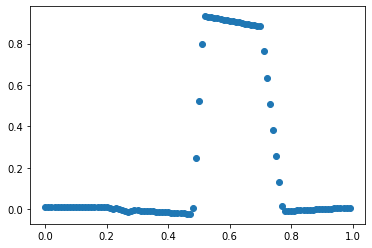

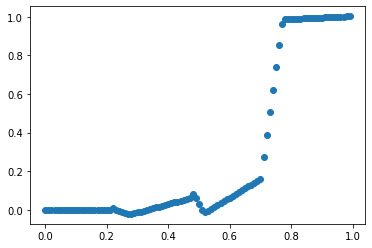

In [10]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=1, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
for i in range(4):
  plt.scatter(x_, y_[:,i])
  plt.show()